In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

### häufigste Wortfrequenz nach Modalwert

In [2]:
def tokenize(lines, pattern=re.compile(r'\p{L}+')):
    """

    :param lines: object to be tokenized, e.g. file
    :param pattern: pattern to tokenize 'lines'
    :return: lowered and tokenized string
    """
    for line in lines:
        yield from map(str.lower, pattern.findall(line))

# def remove_stopwords(tokens):
#     return (token for token in tokenize(tokens) if token not in set(stopwords.words('german')))


def wordcounts_in_file(file):
    """

    :param file: filename of file to be analyzed
    :return: Counter of tokenized file
    """
    with open(file, encoding='utf-8') as f:
        # return Counter(remove_stopwords(f))
        return Counter(tokenize(f))


def word2freq(counts):
    """

    :param counts: a Counter from a file to be analyzed
    :return: list of each words and their frequencies
    """
    words = []
    freq = []
    for c in counts:
        words.append(c)
        freq.append(counts[c])
    return words, freq


def create_pd_series():
    """

    :param path: path to files
    :param prefix: prefix to remove from filename for further use in Series
    :return: list of pd.Series with words and wordcounts per file
    """
    freq_list = []
    for file in glob.glob(path):
        filename = file.replace(prefix, '')
        counts = wordcounts_in_file(file)
        words, freq = word2freq(counts)
        freq_list.append(pd.Series(freq, words, name=filename))
        print(filename)  # später löschen
    return freq_list


def create_dataframe(series):
    """

    :param series: list of pd.Series, created e.g. with create_pd_series()
    :param mfw: value of most frequent words
    :return: document-term-matrix as pd.Dataframe with zscores
    """
    df = pd.DataFrame(series)
    df = df.fillna(0)

#     df = df.div(df.sum(axis=1), axis=0)

    df.loc['Total_per_word'] = df.sum()
    df = df.sort_values(by='Total_per_word', axis=1, ascending=False)
#     df.drop('Total_per_word', axis=0, inplace=True)
    return df

In [3]:
path = "/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/corpus/alles/*.txt"
prefix = "/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/corpus/alles/"
freqs = create_pd_series()

Lied_LebWohlMeinVaterSonnenschein_lemma.txt
Lied_MeinVaterDerKecksteBurscheWar_lemma.txt
Ballade_Will_Pilgerfahrt_lemma.txt
Lied_Geiger_LiedDerKnospen_lemma.txt
Lied_Fallersleben_MeinApfelbaum_lemma.txt
Ballade_Hartleben_Lili_lemma.txt
Lied_Münchhausen_Strassenlied_lemma.txt
Lied_Heyse_TreusteLiebe_lemma.txt
Ballade_Bierbaum_Jeannett_lemma.txt
Ballade_Keller_Sommernacht_lemma.txt
Ballade_Hart_AufDerFahrtNachBerlin_lemma.txt
Ballade_Grosse_ErloscheneKohlen_lemma.txt
Ballade_Huch_AusDemDreissigjaehrigenKriege_lemma.txt
Lied_Geibel_TemporaMutantur_lemma.txt
Lied_Storm_Oktoberlied_lemma.txt
Ballade_Hofmannsthal_MancheFreilligMuessenUntenSterben_lemma.txt
Lied_Dehmel_VenusPrimitiva_lemma.txt
Ballade_Dehmel_DieStilleStadt_lemma.txt
Ballade_Freiligrath_DerGrosseSeehungVonSuleSkerrie_lemma.txt
Lied_Weishaupt_SaengerUndDichter_lemma.txt
Ballade_Daumer_DieLiebeSchuldlos_lemma.txt
Ballade_Nietzsche_Vereinsamt_lemma.txt
Lied_Rodenberg_HierUnterDenGruenenBaeumen_lemma.txt
Lied_Falkland_Menschenlebe

In [12]:
fre = create_dataframe(freqs)
fre

,die,und,in,ich,sein,eine,er,es,du,von,...,abendmeeres,sonnenaufgang,corsar,türkisch,blutroth,spinnen,jerusalem,mohrenlande,menschheit,schöne
Lied_LebWohlMeinVaterSonnenschein_lemma.txt,3.0,5.0,2.0,2.0,4.0,0.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_MeinVaterDerKecksteBurscheWar_lemma.txt,10.0,2.0,2.0,1.0,5.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Will_Pilgerfahrt_lemma.txt,21.0,14.0,4.0,0.0,6.0,4.0,8.0,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geiger_LiedDerKnospen_lemma.txt,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Fallersleben_MeinApfelbaum_lemma.txt,7.0,3.0,3.0,4.0,1.0,3.0,0.0,0.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hartleben_Lili_lemma.txt,5.0,4.0,6.0,6.0,4.0,4.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Münchhausen_Strassenlied_lemma.txt,12.0,8.0,5.0,5.0,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Heyse_TreusteLiebe_lemma.txt,9.0,5.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Bierbaum_Jeannett_lemma.txt,14.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_Sommernacht_lemma.txt,23.0,8.0,6.0,0.0,4.0,7.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### most frequent words with and without stopwords by relative frequencies

In [14]:
ballade = fre.copy()
ballade = ballade[ballade.index.str.contains('Ballade')]
ballade.loc['Summen'] = (ballade.sum(axis=0))
ballade['Total_per_text'] = ballade.sum(axis=1)
ballade = ballade.sort_values(by='Summen', axis=1, ascending=False)
ballade

,Total_per_text,die,und,sein,in,ich,er,eine,es,von,...,purpurflaum,liebekranken,viole,oh,kämst,spröde,schmachtend,schoß,harme,goldkettlein
Ballade_Will_Pilgerfahrt_lemma.txt,238.0,21.0,14.0,6.0,4.0,0.0,8.0,4.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hartleben_Lili_lemma.txt,143.0,5.0,4.0,4.0,6.0,6.0,0.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Bierbaum_Jeannett_lemma.txt,120.0,14.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_Sommernacht_lemma.txt,189.0,23.0,8.0,4.0,6.0,0.0,0.0,7.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hart_AufDerFahrtNachBerlin_lemma.txt,446.0,35.0,29.0,3.0,11.0,5.0,2.0,10.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Grosse_ErloscheneKohlen_lemma.txt,1533.0,123.0,66.0,62.0,47.0,65.0,43.0,24.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Huch_AusDemDreissigjaehrigenKriege_lemma.txt,208.0,22.0,8.0,6.0,1.0,3.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hofmannsthal_MancheFreilligMuessenUntenSterben_lemma.txt,132.0,16.0,6.0,3.0,1.0,1.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Dehmel_DieStilleStadt_lemma.txt,80.0,6.0,3.0,0.0,2.0,0.0,0.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Freiligrath_DerGrosseSeehungVonSuleSkerrie_lemma.txt,211.0,13.0,15.0,8.0,4.0,12.0,8.0,10.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
komplett = ballade['Total_per_text']['Summen']
ballade.drop('Total_per_text', axis=1, inplace=True)
ballade = ballade.T
ballade['rel_sum'] = ballade['Summen']/komplett
ballade = ballade.sort_values(by=['rel_sum'], ascending=False)
#huber = huber[:20]   # uncomment for vis
ballade.T

,die,und,sein,in,ich,er,eine,es,von,du,...,thorheit,schimpf,schmach,hoffnung,hinterlist,münster,daraus,orgel,blos,goldkettlein
Ballade_Will_Pilgerfahrt_lemma.txt,21.000000,14.00000,6.000000,4.000000,0.000000,8.000000,4.000000,0.000000,6.000000,4.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hartleben_Lili_lemma.txt,5.000000,4.00000,4.000000,6.000000,6.000000,0.000000,4.000000,1.000000,2.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Bierbaum_Jeannett_lemma.txt,14.000000,1.00000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_Sommernacht_lemma.txt,23.000000,8.00000,4.000000,6.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hart_AufDerFahrtNachBerlin_lemma.txt,35.000000,29.00000,3.000000,11.000000,5.000000,2.000000,10.000000,6.000000,8.000000,7.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Grosse_ErloscheneKohlen_lemma.txt,123.000000,66.00000,62.000000,47.000000,65.000000,43.000000,24.000000,22.000000,8.000000,15.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Huch_AusDemDreissigjaehrigenKriege_lemma.txt,22.000000,8.00000,6.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,7.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hofmannsthal_MancheFreilligMuessenUntenSterben_lemma.txt,16.000000,6.00000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Dehmel_DieStilleStadt_lemma.txt,6.000000,3.00000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Freiligrath_DerGrosseSeehungVonSuleSkerrie_lemma.txt,13.000000,15.00000,8.000000,4.000000,12.000000,8.000000,10.000000,3.000000,3.000000,2.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_ballade = ballade.copy().T
for x in ohne_stop_ballade:
    if x in stopwords:
        ohne_stop_ballade.drop(x, axis=1, inplace=True)
ohne_stop_ballade

,liegen,nacht,kind,still,herz,seele,licht,stolz,stehen,auge,...,pochen,banner,thorheit,schimpf,schmach,hoffnung,hinterlist,münster,orgel,goldkettlein
Ballade_Will_Pilgerfahrt_lemma.txt,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hartleben_Lili_lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Bierbaum_Jeannett_lemma.txt,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_Sommernacht_lemma.txt,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hart_AufDerFahrtNachBerlin_lemma.txt,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Grosse_ErloscheneKohlen_lemma.txt,3.000000,5.000000,3.000000,3.000000,5.000000,8.000000,0.000000,3.000000,0.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Huch_AusDemDreissigjaehrigenKriege_lemma.txt,0.000000,0.000000,6.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hofmannsthal_MancheFreilligMuessenUntenSterben_lemma.txt,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Dehmel_DieStilleStadt_lemma.txt,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Freiligrath_DerGrosseSeehungVonSuleSkerrie_lemma.txt,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
ohne_stop_ballade = ohne_stop_ballade.T
ohne_stop_ballade = ohne_stop_ballade.sort_values(by=['rel_sum'],ascending=False)
ohne_stop_ballade = ohne_stop_ballade[:20]
ohne_stop_ballade.T

,liegen,nacht,kind,still,herz,seele,licht,stolz,auge,schwer,stehen,himmel,tragen,land,jung,fern,luft,fenster,hell,suchen
Ballade_Will_Pilgerfahrt_lemma.txt,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,1.000000
Ballade_Hartleben_Lili_lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.000000,0.000000,0.000000
Ballade_Bierbaum_Jeannett_lemma.txt,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
Ballade_Keller_Sommernacht_lemma.txt,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.000000,2.000000,1.000000
Ballade_Hart_AufDerFahrtNachBerlin_lemma.txt,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.00000,1.00000,0.00000,1.00000,1.00000,5.00000,2.000000,0.000000,3.000000
Ballade_Grosse_ErloscheneKohlen_lemma.txt,3.000000,5.000000,3.000000,3.000000,5.000000,8.000000,0.000000,3.000000,3.000000,1.000000,0.000000,1.00000,3.00000,2.00000,2.00000,3.00000,1.00000,1.000000,2.000000,0.000000
Ballade_Huch_AusDemDreissigjaehrigenKriege_lemma.txt,0.000000,0.000000,6.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
Ballade_Hofmannsthal_MancheFreilligMuessenUntenSterben_lemma.txt,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.000000,0.000000,0.000000
Ballade_Dehmel_DieStilleStadt_lemma.txt,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
Ballade_Freiligrath_DerGrosseSeehungVonSuleSkerrie_lemma.txt,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.00000,3.00000,0.00000,2.00000,0.00000,0.000000,0.000000,0.000000


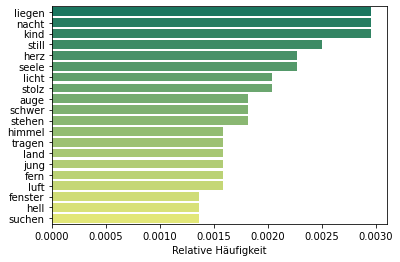

In [29]:
ohne_stop_ballade = ohne_stop_ballade.T
ax = sns.barplot(x=ohne_stop_ballade['rel_sum'], y=ohne_stop_ballade.index, data=ohne_stop_ballade, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/results/datenexploration/MFW_Ballade_ohne_stop')

In [30]:
lied = fre.copy()
lied = lied[lied.index.str.contains('Lied')]
lied.loc['Summen'] = (lied.sum(axis=0))
lied['Total_per_text'] = lied.sum(axis=1)
lied = lied.sort_values(by='Summen', axis=1, ascending=False)
lied

,Total_per_text,die,und,ich,in,sein,du,es,wir,von,...,heuer,christ,zünd,bange,weg,ufer,seh,brückner,edinburger,ueber
Lied_LebWohlMeinVaterSonnenschein_lemma.txt,72.0,3.0,5.0,2.0,2.0,4.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_MeinVaterDerKecksteBurscheWar_lemma.txt,67.0,10.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geiger_LiedDerKnospen_lemma.txt,75.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Fallersleben_MeinApfelbaum_lemma.txt,93.0,7.0,3.0,4.0,3.0,1.0,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Münchhausen_Strassenlied_lemma.txt,112.0,12.0,8.0,5.0,5.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Heyse_TreusteLiebe_lemma.txt,86.0,9.0,5.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geibel_TemporaMutantur_lemma.txt,434.0,64.0,17.0,5.0,5.0,6.0,1.0,4.0,16.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Storm_Oktoberlied_lemma.txt,130.0,17.0,4.0,0.0,1.0,3.0,0.0,7.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Dehmel_VenusPrimitiva_lemma.txt,235.0,22.0,5.0,13.0,7.0,1.0,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Weishaupt_SaengerUndDichter_lemma.txt,73.0,14.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
komplett = lied['Total_per_text']['Summen']
lied.drop('Total_per_text', axis=1, inplace=True)
lied = lied.T
lied['rel_sum'] = lied['Summen']/komplett
lied = lied.sort_values(by=['rel_sum'], ascending=False)
lied.T

,die,und,ich,in,sein,du,es,wir,von,so,...,gewinnen,kissen,barbar,obgleich,schmelz,decken,platz,rar,zimmer,ueber
Lied_LebWohlMeinVaterSonnenschein_lemma.txt,3.00000,5.000000,2.000000,2.00000,4.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_MeinVaterDerKecksteBurscheWar_lemma.txt,10.00000,2.000000,1.000000,2.00000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geiger_LiedDerKnospen_lemma.txt,10.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Fallersleben_MeinApfelbaum_lemma.txt,7.00000,3.000000,4.000000,3.00000,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Münchhausen_Strassenlied_lemma.txt,12.00000,8.000000,5.000000,5.00000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Heyse_TreusteLiebe_lemma.txt,9.00000,5.000000,0.000000,2.00000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geibel_TemporaMutantur_lemma.txt,64.00000,17.000000,5.000000,5.00000,6.000000,1.000000,4.000000,16.000000,8.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Storm_Oktoberlied_lemma.txt,17.00000,4.000000,0.000000,1.00000,3.000000,0.000000,7.000000,6.000000,0.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Dehmel_VenusPrimitiva_lemma.txt,22.00000,5.000000,13.000000,7.00000,1.000000,8.000000,1.000000,0.000000,1.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Weishaupt_SaengerUndDichter_lemma.txt,14.00000,2.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_lied = lied.copy().T
for x in ohne_stop_lied:
    if x in stopwords:
        ohne_stop_lied.drop(x, axis=1, inplace=True)
ohne_stop_lied

,herz,lied,nacht,schön,singen,süß,freund,verwandelt,dunkel,stehen,...,gewinnen,kissen,barbar,obgleich,schmelz,decken,platz,rar,zimmer,ueber
Lied_LebWohlMeinVaterSonnenschein_lemma.txt,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_MeinVaterDerKecksteBurscheWar_lemma.txt,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geiger_LiedDerKnospen_lemma.txt,0.000000,0.000000,6.000000,1.000000,0.000000,2.000000,0.000000,0.000000,4.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Fallersleben_MeinApfelbaum_lemma.txt,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Münchhausen_Strassenlied_lemma.txt,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Heyse_TreusteLiebe_lemma.txt,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geibel_TemporaMutantur_lemma.txt,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,7.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Storm_Oktoberlied_lemma.txt,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Dehmel_VenusPrimitiva_lemma.txt,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Weishaupt_SaengerUndDichter_lemma.txt,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
ohne_stop_lied = ohne_stop_lied.T
ohne_stop_lied = ohne_stop_lied.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_lied = ohne_stop_lied[:20]

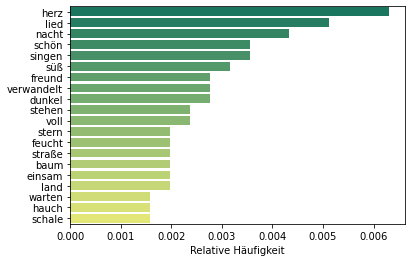

In [34]:
ax = sns.barplot(x=ohne_stop_lied['rel_sum'], y=ohne_stop_lied.index, data=ohne_stop_lied, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/results/datenexploration/MFW_Lied_ohne_stop')

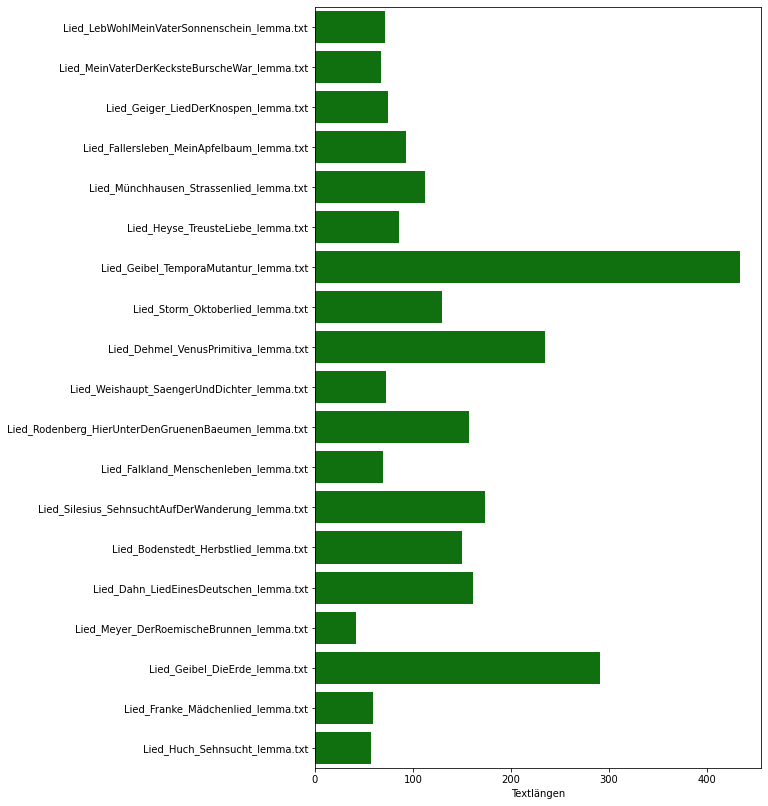

In [38]:
lied = fre.copy()
lied = lied[lied.index.str.contains('Lied')]
lied['Total_per_text'] = lied.sum(axis=1)

plt.figure(figsize=(8,14))
ax = sns.barplot(x=lied.Total_per_text, y=lied.index, data=lied, color='g')
ax.set(xlabel='Textlängen')
plt.savefig('textlängen_Lied')

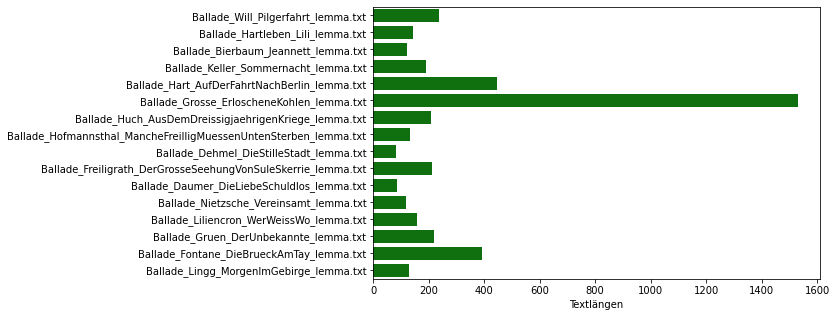

In [40]:
ballade = fre.copy()
ballade = ballade[ballade.index.str.contains('Ballade')]
ballade['Total_per_text'] = ballade.sum(axis=1)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=ballade.Total_per_text, y=ballade.index, data=ballade, color='g')
ax.set(xlabel='Textlängen')
plt.savefig('textlängen_Ballade')

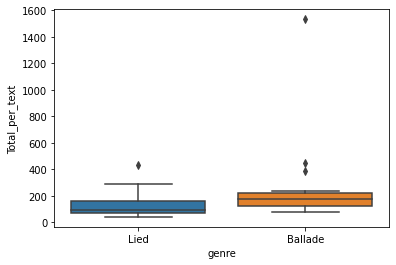

In [41]:
lied['genre'] = 'Lied'
ballade['genre'] = 'Ballade'
alle = pd.concat([lied, ballade])
sns.boxplot(x=alle.genre, y=alle.Total_per_text)
plt.savefig('/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/results/datenexploration/boxplot_textlaenge')

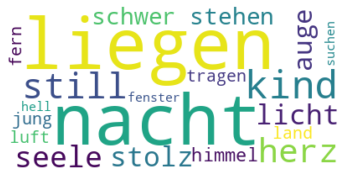

In [50]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = ohne_stop_ballade['rel_sum']
# text = abba.any()
makeImage(text, "/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/results/datenexploration/wordcloud_ballade")

In [49]:
ax = sns.distplot(lied['rel_sum'], hist=False, label="Lied")
ax = sns.distplot(ballade['rel_sum'], hist=False, label="Ballade")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

KeyError: 'rel_sum'

### compare delta values for texts by same and different authors

In [155]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax.lines[1]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
    plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

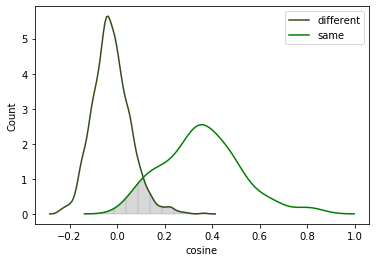

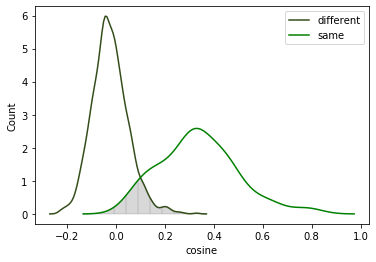

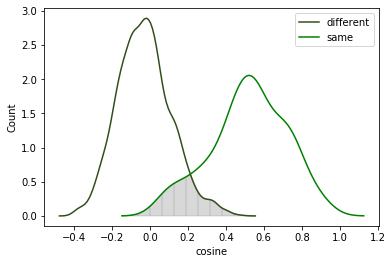

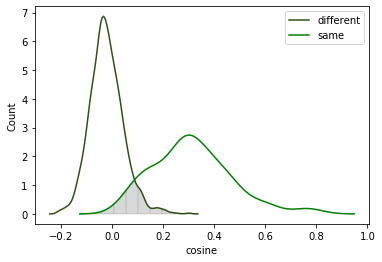

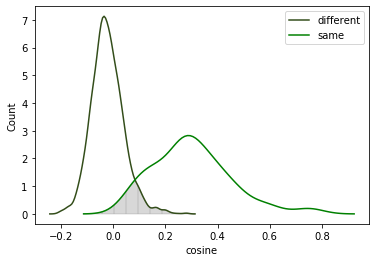

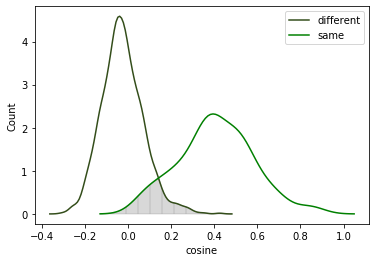

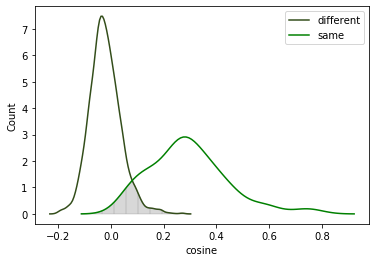

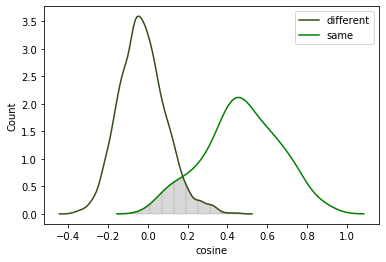

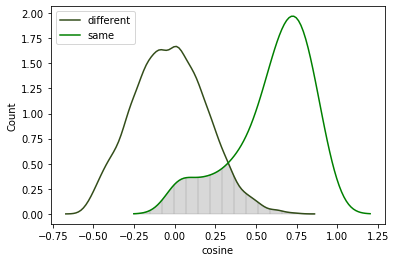

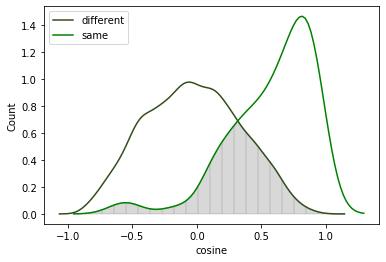

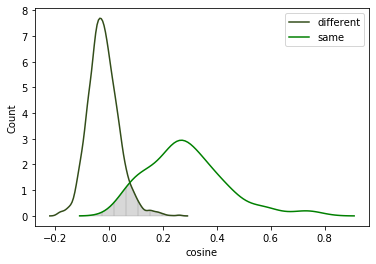

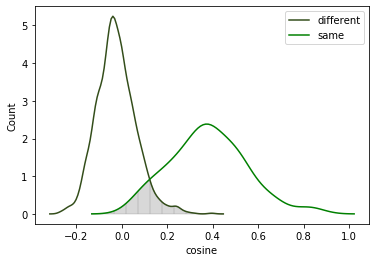

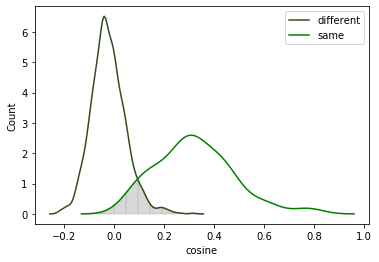

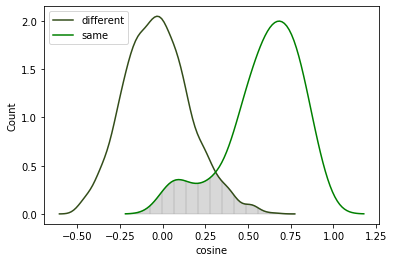

In [156]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


In [ ]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


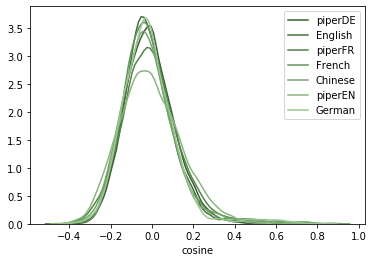

In [63]:
path = 'results/1000/*.h5'
prefix = 'results/1000'
for file in glob.glob(path):
    language = pd.read_hdf(file)
    language = language[language.cosine!=1.00]
    corp = file.replace('.h5', '').split('_')[2]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('delta_normaldist_1000mfw')

### Delta variance per corpus

In [86]:
var = pd.read_hdf("project_stylometry_statistics/results/Chinese/delta/1000_delta_Chinese.h5")
v = var.copy()
v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,manhattan,cosine,euclidean,label,author
"BiShuMin,HuaGuanBingDu,seg.txt",0.00,0.00,0.00,same,BiShuMin
"BiShuMin,LanSeTianTang,seg.txt",589.27,0.49,30.22,same,BiShuMin
"YvQiuyv,ShuangLengChangHe,seg.txt",751.50,0.73,36.28,different,YvQiuyv
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",751.84,0.80,36.84,different,LongYingtai
"YvQiuyv,XingZheWuJiang,seg.txt",758.32,0.76,36.53,different,YvQiuyv
...,...,...,...,...,...
"ZhouRuchang,HongLouShiErCeng,seg.txt",1049.81,1.11,49.20,different,ZhouRuchang
"ZhouGuoping,ShouWangDeJuLi,seg.txt",1050.02,1.13,48.56,different,ZhouGuoping
"ZhouRuchang,HongLouBieYangHong,seg.txt",1057.65,1.10,48.87,different,ZhouRuchang
"ZhouGuoping,LingHunZhiNengDuXing,seg.txt",1066.59,1.13,48.77,different,ZhouGuoping


In [58]:
#variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,corpus
1,0.60,piperDE
2,0.75,piperDE
3,0.71,piperDE
4,0.75,piperDE
5,0.78,piperDE
...,...,...
5620,1.11,Chinese
5621,1.13,Chinese
5622,1.10,Chinese
5623,1.13,Chinese


In [9]:
import pandas as pd 
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta.sort_values(by=['corpus'], inplace=True)
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
3755,"YanGelin,LvXie,seg.txt",0.09,Chinese
3754,"YanGelin,LuFanYanShi,seg.txt",0.10,Chinese
3753,"JiaPingwa,QinQiang,seg.txt",0.32,Chinese
3752,"ChenZhongshi,ChuXia,seg.txt",0.40,Chinese
...,...,...,...
37703,"Cladel,Leon_OMPDRAILLES_Novel.txt",-0.03,pipierFR
37704,"Zola,Emile_LeventredeParis_Novel.txt",-0.07,pipierFR
37705,"Charriere,IsabelleDe_CalisteOuLettresDeLausann...",0.12,pipierFR
37641,"Dumas,Alexandre_OlympesDesCleves_Novel.txt",-0.01,pipierFR


In [10]:
cutoff = pd.read_csv("entire_best_cutoff.csv")
cutoff.sort_values(by=['corpus'], inplace=True)
cutoff                   

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500


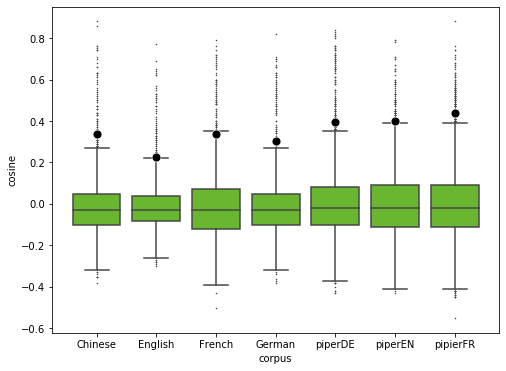

In [14]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='corpus', y='cosine', data=vdelta, color=(0.4, 0.8, 0.1), fliersize=0.5)
ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [9]:
cos = pd.read_hdf("../results/German/delta/1000_delta_German.h5")
cos = cos[cos.cosine!=1.00]

In [10]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.6191277293757895 0.33281671506865484 0.08468876630119851 -0.13606131532080637


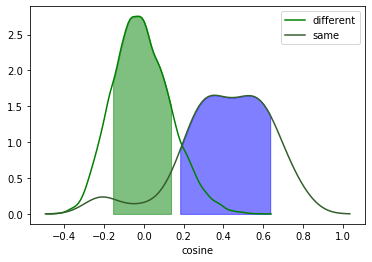

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


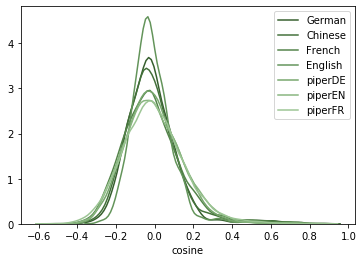

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')

#### PCA

In [76]:
mfw = fre.iloc[:,:1000]
mfw

,die,und,in,ich,sein,eine,er,es,du,von,...,thut,keuchen,uralt,fährde,brückendamm,mondenscheine,alleine,nachts,alpsohn,südlich
Lied_LebWohlMeinVaterSonnenschein_lemma.txt,3.0,5.0,2.0,2.0,4.0,0.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_MeinVaterDerKecksteBurscheWar_lemma.txt,10.0,2.0,2.0,1.0,5.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Will_Pilgerfahrt_lemma.txt,21.0,14.0,4.0,0.0,6.0,4.0,8.0,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Geiger_LiedDerKnospen_lemma.txt,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Fallersleben_MeinApfelbaum_lemma.txt,7.0,3.0,3.0,4.0,1.0,3.0,0.0,0.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Hartleben_Lili_lemma.txt,5.0,4.0,6.0,6.0,4.0,4.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Münchhausen_Strassenlied_lemma.txt,12.0,8.0,5.0,5.0,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lied_Heyse_TreusteLiebe_lemma.txt,9.0,5.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Bierbaum_Jeannett_lemma.txt,14.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_Sommernacht_lemma.txt,23.0,8.0,6.0,0.0,4.0,7.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Prosa nur lemmatisierter Text

In [77]:
path = '/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/corpus/alles/*.txt'
prefix = '/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/corpus/alles/'
    
text_list = []
for file in glob.glob(path):
    filename = file.replace(prefix, '').replace('.txt', '')
    with open(file, 'r') as f:
        data = f.read().replace('\n', ' ')        
    text_list.append(pd.Series(data, name=filename))

song = pd.DataFrame(text_list)
song['mfw'] = '0'
song['sprechmarker'] = '0'
song['emotionen'] = '0'
song.head()

,0,mfw,sprechmarker,emotionen
Lied_LebWohlMeinVaterSonnenschein_lemma,„leb ' wohl mein vater sonnenschein du mei...,0,0,0
Lied_MeinVaterDerKecksteBurscheWar_lemma,mein vater die keckste bursche sein von alle b...,0,0,0
Ballade_Will_Pilgerfahrt_lemma,durch dunkel grabzypressen hauchen geheimnisvo...,0,0,0
Lied_Geiger_LiedDerKnospen_lemma,ach dass die dunkel nacht die feucht nacht...,0,0,0
Lied_Fallersleben_MeinApfelbaum_lemma,o dass du gott behüten in+die paradies kaum ...,0,0,0


Prosa mit 1000 MFW, Sprechmarkern und Emotionen

In [78]:
for i, row in song.iterrows():
    string = ''
    for m in mfw.columns:
        if m in row[0]:
            string += m
            string += ' '
    row.mfw = string

In [79]:
sprechmarker = ['sagen', 'sprechen', 'fragen', 'antworten', 'schreien', 'jammern', 'Antwort']

for i, row in song.iterrows():
    string = ''
    for m in sprechmarker:
        if m in row[0]:
            string += m
            string += ' '
    row.sprechmarker = string

In [86]:
emotion = ['liebreich','angst', 'ängstlich', 'trauer', 'traurig', 'zornig', 'zorn', 'verachtungsvoll', 'verachtung',
           'schuld', 'schuldig', 'liebe',  'geliebt', 'liebevoll', 'stolz', 'scham', 'schämen', 'überrasschung',
           'überrascht', 'sorge', 'sorgenvoll', 'ekel', 'ekeln', 'angeekelt', 'neid', 'neidisch', 'neidvoll',
           'glücklich', 'glück', 'freude', 'freudig', 'freuen', 'erleichterung', 'erleichtert', 'vergnügt', 'vergnügen',
           'zufrieden', 'zufriedenheit', 'verzweiflung', 'verzweifelt', 'verlegenheit', 'verlegen', 'aufregung',
           'aufgeregt', 'aufregen', 'spannung', 'gespannt', 'erregung', 'erregt', 'hoffen', 'hoffnung', 'befriedigt',
           'langweilig', 'langeweile', 'mitgefühl', 'mitfühlen', 'enttäuscht', 'enttäuschung', 'frust', 'frustriert',
           'eifersucht', 'eifersüchtig', 'wut', 'wütend', 'reue', 'schock', 'schockiert', 'zuneigung', 'verärgert',
           'verärgerung', 'erwartungsvoll', 'erwartung', 'vorfreude', 'scheu', 'gelassen', 'gelassenheit', 'mut',
           'mutig', 'neugierde', 'neugierig', 'depression', 'depressiv', 'niedergeschlagenheit', 'niedergeschlagen',
           'lustvoll', 'lust', 'rausch', 'einfühlend', 'einfühlsam', 'euphorisch', 'euphorie', 'dankbarkeit', 'dankbar',
           'hass', 'entsetzt', 'entsetzen', 'demütigung', 'demütig', 'demut', 'interesse', 'interessiert', 'einsamkeit',
           'einsam', 'empörung', 'empört', 'vertrauen', 'qualvoll', 'qual', 'gleichgültigkeit', 'gleichgültig',
           'fröhlichkeit', 'fröhlich', 'schadenfroh', 'schadenfreude', 'schmerz', 'melancholie', 'melancholisch',
           'panik', 'panisch']

for i, row in song.iterrows():
    string = ''
    for m in emotion:
        if m in row[0]:
            string += m
            string += ' '
    row.emotionen = string

In [87]:
song['genre'] = '0'
song['titel'] = '0'

for i, row in song.iterrows():
    row['genre'] = i.split("_")[0]
    row['titel'] = i.split("_")[:]
song = song.rename(columns={0: "text"})
song.head()

,text,mfw,sprechmarker,emotionen,genre,titel
Lied_LebWohlMeinVaterSonnenschein_lemma,„leb ' wohl mein vater sonnenschein du mei...,die und in ich sein eine er es du von zu mein ...,,sorge mut,Lied,"[Lied, LebWohlMeinVaterSonnenschein, lemma]"
Lied_MeinVaterDerKecksteBurscheWar_lemma,mein vater die keckste bursche sein von alle b...,die und in ich sein eine er von zu mein an so ...,,mut,Lied,"[Lied, MeinVaterDerKecksteBurscheWar, lemma]"
Ballade_Will_Pilgerfahrt_lemma,durch dunkel grabzypressen hauchen geheimnisvo...,die und in ich sein eine er es du von zu wir w...,,scheu,Ballade,"[Ballade, Will, Pilgerfahrt, lemma]"
Lied_Geiger_LiedDerKnospen_lemma,ach dass die dunkel nacht die feucht nacht...,die in ich eine er du von zu wir auf an so mit...,,,Lied,"[Lied, Geiger, LiedDerKnospen, lemma]"
Lied_Fallersleben_MeinApfelbaum_lemma,o dass du gott behüten in+die paradies kaum ...,die und in ich sein eine er es du von zu mein ...,,lust,Lied,"[Lied, Fallersleben, MeinApfelbaum, lemma]"


/home/piah/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


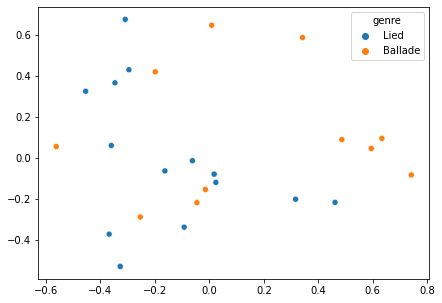

In [90]:
x = TfidfVectorizer().fit_transform(song.emotionen)
X = TruncatedSVD(n_components=29, random_state=0).fit_transform(x)
pca = PCA(n_components=2)
X_tf = pca.fit_transform(X)
plt.figure(figsize=(7,5))
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue=song.genre, marker="o")

plt.savefig('/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/results/PCA_emotionen_genres.png', bbox_inches = "tight")

In [91]:
for i,row in song.iterrows():
    c = Counter(row.text.split())
    song.at[i, 'number_of_tokens'] = sum(c.values())
    song.at[i, 'number_of_types'] = int(len(c))
song

,text,mfw,sprechmarker,emotionen,genre,titel,number_of_tokens,number_of_types
Lied_LebWohlMeinVaterSonnenschein_lemma,„leb ' wohl mein vater sonnenschein du mei...,die und in ich sein eine er es du von zu mein ...,,sorge mut,Lied,"[Lied, LebWohlMeinVaterSonnenschein, lemma]",75.0,54.0
Lied_MeinVaterDerKecksteBurscheWar_lemma,mein vater die keckste bursche sein von alle b...,die und in ich sein eine er von zu mein an so ...,,mut,Lied,"[Lied, MeinVaterDerKecksteBurscheWar, lemma]",67.0,46.0
Ballade_Will_Pilgerfahrt_lemma,durch dunkel grabzypressen hauchen geheimnisvo...,die und in ich sein eine er es du von zu wir w...,,scheu,Ballade,"[Ballade, Will, Pilgerfahrt, lemma]",232.0,151.0
Lied_Geiger_LiedDerKnospen_lemma,ach dass die dunkel nacht die feucht nacht...,die in ich eine er du von zu wir auf an so mit...,,,Lied,"[Lied, Geiger, LiedDerKnospen, lemma]",74.0,38.0
Lied_Fallersleben_MeinApfelbaum_lemma,o dass du gott behüten in+die paradies kaum ...,die und in ich sein eine er es du von zu mein ...,,lust,Lied,"[Lied, Fallersleben, MeinApfelbaum, lemma]",90.0,52.0
Ballade_Hartleben_Lili_lemma,als ich dann wieder in die heimat kommen ...,die und in ich sein eine er es von zu wir wie ...,sprechen,lust qual,Ballade,"[Ballade, Hartleben, Lili, lemma]",146.0,95.0
Lied_Münchhausen_Strassenlied_lemma,es liegen etwas auf die straße in+die land umh...,die und in ich eine er es du zu mein wie auf a...,sagen,glück,Lied,"[Lied, Münchhausen, Strassenlied, lemma]",111.0,61.0
Lied_Heyse_TreusteLiebe_lemma,gi bruder und eine schwester nichts treueres...,die und in ich sein eine er es von wie auf an ...,,reue lust,Lied,"[Lied, Heyse, TreusteLiebe, lemma]",85.0,63.0
Ballade_Bierbaum_Jeannett_lemma,was sein mein schatz eine plättmamsell wo ...,die und in ich sein eine er es von zu mein wie...,,liebe glück lust rausch,Ballade,"[Ballade, Bierbaum, Jeannett, lemma]",113.0,79.0
Ballade_Keller_Sommernacht_lemma,es wallen die korn weit in die runde und wie e...,die und in ich sein eine er es du von zu mein ...,,neid lust,Ballade,"[Ballade, Keller, Sommernacht, lemma]",183.0,124.0


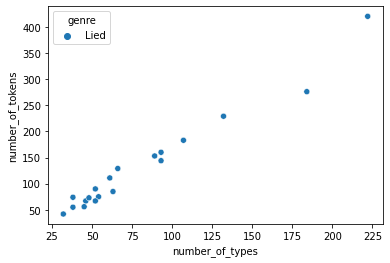

In [93]:
# plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='genre', data=song[song.genre=='Lied'])
plt.savefig('/home/piah/Dokumente/Projektarbeit_LyrikGattungszuweisung/corpus/results/type_token_ratio_lied')